# CDS503: Machine Learning

***
## LAB 3: Decision Tree (DT)

**Decision trees** are *supervised* learning algorithms used for both, **classification** and **regression** tasks where we will concentrate on classification in this lab.

Decision trees are assigned to the information based learning algorithms which use different measures of information gain for learning. We can use decision trees for issues where we have **continuous** but also **categorical** input and target features. The main idea of decision trees is to find those descriptive features which contain the most "information" regarding the target feature and then split the dataset along the values of these features such that the target feature values for the resulting sub_datasets are as pure as possible --> The descriptive feature which leaves the target feature most purely is said to be the most informative one. 

This process of finding the "most informative" feature is done until we accomplish a stopping criteria where we then finally end up in so called *leaf nodes*. The *leaf nodes* contain the **predictions** we will make for new query instances presented to our trained model. This is possible since the model has kind of learned the underlying structure of the **training** data and hence can, given some assumptions, make predictions about the target feature value (class) of unseen query instances. A decision tree mainly contains of a **root node**, **interior nodes**, and **leaf nodes** which are then connected by branches.

<img src="01.png" style="width:60%;margin-left:auto;margin-right:auto;">

In simplified terms, the process of **training** a decision tree and **predicting** the target features of query instances is as follows:

-  Present a dataset containing of a number of training instances characterized by a number of descriptive features and a target feature
-  Train the decision tree model by continuously splitting the target feature along the values of the descriptive features using a measure of information gain during the training process
-  Grow the tree until we accomplish a stopping criteria --> create leaf nodes which represent the predictions we want to make for new query instances
-  Show query instances to the tree and run down the tree until we arrive at leaf nodes

So what do we know until know? In principal decision trees can be used to predict the target feature of a unknown query instance by building a model based on existing data for which the target feature values are known (supervised learning). 

Additionally, we know that this model can make **predictions** for *unknown* query instances because it models the *relationship* between the known *descriptive features* and the known *target feature*. In our following example, the tree model learns "how a specific animal species looks like" respectively the combination of descriptive feature values distinctive for animal species.

Also, we know that to train a decision tree model we need a dataset consisting of a number of training examples characterized by a number of descriptive features and a target feature.

<img src="02.png" style="width:100%;margin-left:auto;margin-right:auto;">

***
### Step1: Business Understanding

***

This data was extracted from the census bureau database found at: http://www.census.gov/ftp/pub/DES/www/welcome.html. It contains the cencus income of the people. They are trying to see the income of more than 50k and less than 50k.
| Class label '>50K'  : 23.93% / 24.78% (without unknowns)
| Class label '<=50K' : 76.07% / 75.22% (without unknowns)


### Step 2: Data Understanding

#### Description of the data:
In the censuc income data set, there are fifteen attributes including the class attribute indicating the class/category information. 
The 15 attributes are:
-  age: continuous.
-  workclass:
    - Private
    - Self-emp-not-inc
    - Self-emp-inc
    - Federal-gov
    - Local-gov
    - State-gov
    - Without-pay
    - Never-worked
- fnlwgt: continuous.
- education: 
    - Bachelors 
    - Some-college
    - 11th
    - HS-grad
    - Prof-school
    - Assoc-acdm
    - Assoc-voc
    - 9th
    - 7th-8th
    - 12th
    - Masters
    - 1st-4th
    - 10th
    - Doctorate
    - 5th-6th
    - Preschool
- education-num: continuous.
- marital-status: 
    - Married-civ-spouse
    - Divorced
    - Never-married
    - Separated
    - Widowed
    - Married-spouse-absent
    - Married-AF-spouse
- occupation: 
    - Tech-support
    - Craft-repair
    - Other-service
    - Sales
    - Exec-managerial
    - Prof-specialty
    - Handlers-cleaners
    - Machine-op-inspct
    - Adm-clerical
    - Farming-fishing
    - Transport-moving
    - Priv-house-serv
    - Protective-serv
    - Armed-Forces
- relationship: 
    - Wife
    - Own-child
    - Husband
    - Not-in-family
    - Other-relative
    - Unmarried
- race: 
    - White
    - Asian-Pac-Islander
    - Amer-Indian-Eskimo
    - Other
    - Black
- sex: 
    - Female
    - Male
- capital-gain: continuous
- capital-loss: continuous
- hours-per-week: continuous.
- native-country: 
    - United-States
    - Cambodia
    - England
    - Puerto-Rico
    - Canada
    - Germany
    - Outlying-US(Guam-USVI-etc)
    - India
    - Japan
    - Greece
    - South
    - China
    - Cuba
    - Iran
    - Honduras
    - Philippines
    - Italy
    - Poland
    - Jamaica
    - Vietnam
    - Mexico
    - Portugal
    - Ireland
    - France
    - Dominican-Republic
    - Laos
    - Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador,    Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import  accuracy_score, confusion_matrix, precision_recall_fscore_support
import warnings # to hide unnecesary warning
warnings.filterwarnings('ignore')                                                            
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np

train = pd.read_csv("input/adult_train_modified.csv")
test = pd.read_csv("input/adult_test_modified.csv")
train.shape

(30162, 15)

***
### Visualizing The Data

While visualizing is made easy using `seaborn` library, it does limits the **ways** to manipulate the visual *aesthetics* of the plot. Nevertheless, the following showed some *examples* of advance plots on the data. Check this link for further exploration using advance plot of seaborn library: https://seaborn.pydata.org/tutorial/distributions.html

### Introduction to Correlation Heatmap

**Correlation** is a term used to represent the statistical measure of linear relationship between two variables. It can also be defined as the measure of dependence between two different variables. If there are multiple variables and the goal is to find correlation between all of these variables and store them using appropriate data structure, the matrix data structure is used. Such matrix is called as correlation matrix. 

**Correlation heatmap** is graphical representation of correlation matrix representing correlation between different variables. 

Dependence between two variables, also termed as correlation, can be measured using the following:

- Correlation coefficient / Pearson correlation coefficient which measures how the value of two different variables vary with     respect to each other.  
- Rank correlation coefficient metric such as Spearman correlation coefficient is used to measure the extent to which one         variable increases / decreases as the other variable increases / decreases. 

Pearson correlation coefficient between two variables X and Y can be calculated using the following formula. X bar is mean value of X and Y bar is mean value of Y. \(X_i\) and \(Y_i\) represents different values of X and Y.

<img src="Correlation.png" style="width:20%;margin-left:auto;margin-right:auto;">

The value of correlation coefficient can take any values from -1 to 1.

- **If the value is 1**, it is said to be **positive correlation** between two variables. This means that when one variable       increases, the other variable also increases.
- **If the value is -1**, it is said to be **negative correlation** between two variables. This means that when one variable     increases, the other variable decreases.
- **If the value is 0**, there is no correlation between two variables. This means that the variables changes in a random         manner with respect to each other.

Further reading: https://vitalflux.com/correlation-heatmap-with-seaborn-pandas/

(15.5, -0.5)

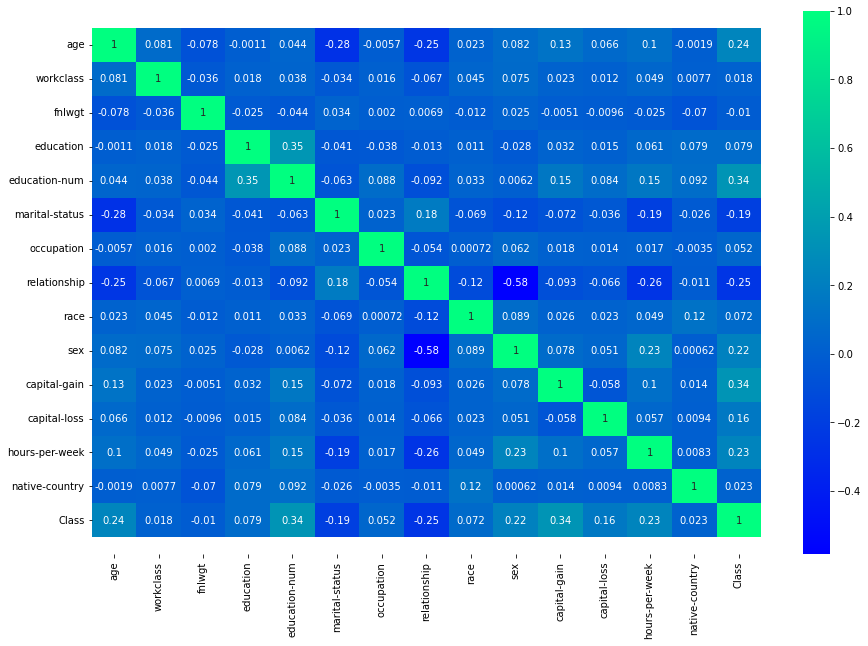

In [3]:
import seaborn as sns

# correlations using heat map plot
plt.figure(figsize=(15,10))
ax = sns.heatmap(train.corr(),annot=True,cmap='winter', cbar=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

<AxesSubplot:xlabel='Class', ylabel='count'>

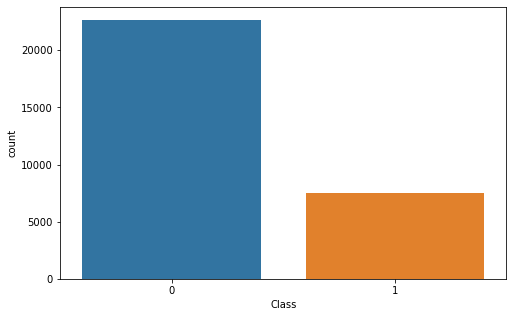

In [4]:
plt.figure(figsize=(8,5))

# count rows of each classes
sns.countplot(x="Class", data=train)

***
### Step 3: Data Preparation

In [4]:
# select all columns except the last one (the target label)
x_train=train.iloc[:,:-1]
# set target categorical data label (15th attribute)
y_train=train.iloc[:,14]

# select all columns except the last one (the target label)
x_test=test.iloc[:,:-1]
# set target categorical data label (sixth attribute)
y_test=test.iloc[:,14]

# select all columns except the last one (the target label)
#x=train.iloc[:,:-1]
# set target categorical data label (sixth attribute)
#y=train.iloc[:,13]

#x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0)

Check the data so far:

In [5]:
print('-------- x axis test ----------')
print(x_test)
print('-------- x axis train ---------')
print(x_train)
print('-------- y axis test ----------')
print(y_test)
print('-------- y axis train ---------')
print(y_train)
print('*******************************')

-------- x axis test ----------
       age  workclass  fnlwgt  education  education-num  marital-status  \
0        8          2    8315          1              6               4   
1       21          2    1754         11              8               2   
2       11          1   10750          7             11               2   
3       27          2    4780         15              9               2   
4       17          2    7091          0              5               4   
...    ...        ...     ...        ...            ...             ...   
15055   16          2    8927          9             12               4   
15056   22          2    7893          9             12               0   
15057   21          2   11193          9             12               2   
15058   27          2    1593          9             12               0   
15059   18          3    6062          9             12               2   

       occupation  relationship  race  sex  capital-gain  capital-l

***
### Step 4: Modelling
#### Classify using Decision Tree

We are using **DecisionTreeClassifier** sklearn package to run this sample.

DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.

As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, of shape (n_samples, n_features) holding the training samples, and an array Y of integer values, shape (n_samples,), holding the class labels for the training samples.

There are plenty of parameters option you can play around and check if it able to improve the performance of your model.

- class sklearn.tree.DecisionTreeClassifier(*, criterion='gini/entropy', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

Further reading: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

<img src="Part 4.png" style="width:80%;margin-left:auto;margin-right:auto;">

### Step 5: Evaluation

From here, we apply the decision tree model and draw the results output using the `sklearn` confusion matrix. As such, we can justify and determine the *number* of instances being **correctly classified** and **misclassified**.

The classification report is about key metrics in a classification problem.

You'll have precision, recall, f1-score and support for each class you're trying to find.

- The **recall** means "how many of this class you find over the whole number of element of this class"

- The **precision** will be "how many are correctly classified among that class"

- The **f1-score** is the harmonic mean between precision & recall

- The **support** is the number of occurence of the given class in your dataset (so you have 11360 of class 0 and 3700 of class 1,   which is consider as imbalanced dataset with (IR = 3.07).

- In the case of **weighted average** the performance metrics are weighted accordingly:
  score weighted avg = (Class 0 %)(score class 0) + (Class 1 %)(score class 1)

- However, **macro avg** is not weighted and therefore
  score macro avg = 0.5(score class 0) + 0.5(score class 1)
  
The thing is, precision and recall is highly used for imbalanced dataset because in an highly imbalanced dataset, a 99% accuracy can be meaningless.

I would say that you don't really need to look at these metrics for this problem , unless a given class should absolutely be correctly determined.
                                                                                 
<img src="Part 5.png" style="width:80%;margin-left:auto;margin-right:auto;">

              precision    recall  f1-score   support

           0       0.86      0.87      0.87     11360
           1       0.59      0.58      0.59      3700

    accuracy                           0.80     15060
   macro avg       0.73      0.73      0.73     15060
weighted avg       0.80      0.80      0.80     15060

The prediction accuracy is: 79.88%


Text(0.5, 51.0, 'Predicted label')

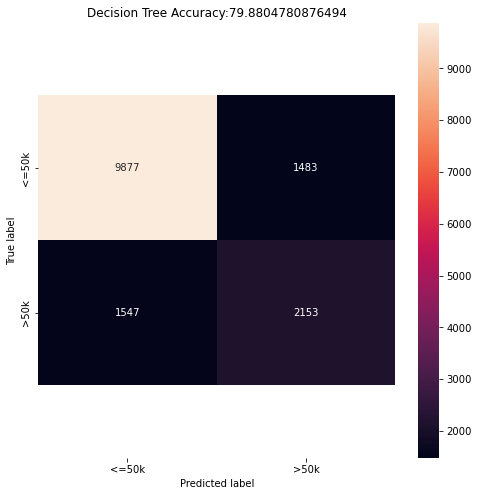

In [6]:
# Import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

# input the decision tree classifier using "entropy" & train the model
dtree = DecisionTreeClassifier(random_state = 0, criterion = 'gini').fit(x_train, y_train)

# predict the classes of new, unseen data
predict = dtree.predict(x_test)

print (classification_report(y_test, predict))
print("The prediction accuracy is: {0:2.2f}{1:s}".format(dtree.score(x_test,y_test)*100,"%"))


# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['<=50k','>50k'], 
                     columns = ['<=50k','>50k'])

# plot the confusion matrix
plt.figure(figsize=(8,8))
ax= sns.heatmap(cm_df, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Decision Tree Accuracy:" + str(dtree.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

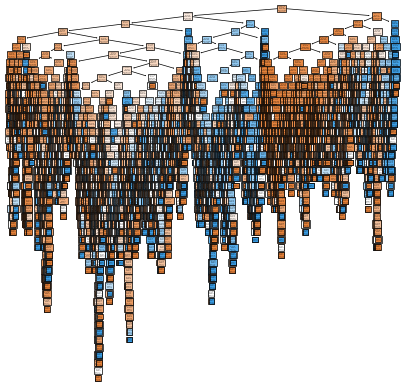

In [8]:
#Plotting the Tree
from sklearn import tree
fn = ["age",
      "workclass",
      "fnlwgt",
      "education",
      "education-num",
      "marital-status",
      "occupation",
      "relationship",
      "race",
      "sex",
      "capital-gain",
      "capital-loss",
      "hours-per-week",
      "native-country"]
cn = ["<=50k",">50k"]
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=50)
tree.plot_tree(dtree, filled = True, feature_names = fn, class_names = cn);
fig.savefig('imagename.svg')

***
### Summary

#### Advantages:
-  White box, easy to interpret model
-  No feature normalization needed
-  Tree models can handle both continuous and categorical data (Classification and Regression Trees)
-  Can model nonlinear relationships
-  Can model interactions between the different descriptive features

#### Disadvantages:

-  If continuous features are used the tree may become quite large and hence less interpretable
-  Decision trees are prone to overfit the training data and hence do not well generalize the data if no stopping criteria or improvements like pruning, boosting or bagging are implemented
-  Small changes in the data may lead to a completely different tree. This issue can be addressed by using ensemble methods like bagging, boosting or random forests
-  Unbalanced datasets where some target feature values occur much more frequently than others may lead to biased trees since the frequently occurring feature values are preferred over the less frequently occurring ones. We can address this by ensuring that the dataset is relatively balanced in terms of the target feature values
-  If the number of features is relatively large (high dimensional) and the number of instances is relatively low, the tree might overfit the data
-  Features with many levels may be preferred over features with less levels since for them it is "more easy" to split the dataset such that the sub_datasets only contain pure target feature values. This issue can be addressed by preferring for instance the information gain ratio as splitting criteria over information gain